# Random Numbers and Probability
> In this chapter, you'll learn how to generate random samples and measure chance using probability. You'll work with real-world sales data to calculate the probability of a salesperson being successful. Finally, you’ll use the binomial distribution to model events with binary outcomes. This is the Summary of lecture "Introduction to Statistics in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Statistics]
- image: images/uniform_dist_wait.png 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

## What are the chances?
- Measuring chance

What's the probability of an event?
$$ P(\text{event}) = \frac{\text{# ways event can happen}}{\text{total # of possible outcomes}} $$

### Calculating probabilities
You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by

$$ P(\text{event}) = \frac{\text{# ways event can happen}}{\text{total # of possible outcomes}} $$

In [2]:
amir_deals = pd.read_csv('./dataset/amir_deals.csv', index_col=0)
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [3]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

# Calculate probability of picking a deal with each product
probs = counts / len(amir_deals['product'])
print(probs)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


### Sampling deals
In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

In [4]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5, replace=False)
print(sample_without_replacement)

       product   client status   amount  num_users
128  Product B  Current    Won  2070.25          7
149  Product D  Current    Won  3485.48         52
78   Product B  Current    Won  6252.30         27
105  Product D  Current    Won  4110.98         39
167  Product C      New   Lost  3779.86         11


In [5]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

       product   client status   amount  num_users
163  Product D  Current    Won  6755.66         59
132  Product B  Current    Won  6872.29         25
88   Product C  Current    Won  3579.63          3
146  Product A  Current    Won  4682.94         63
146  Product A  Current    Won  4682.94         63


## Discrete distributions
- Probability distribution
    - Describes the probability of each possible outcome in a scenario
    - **Expected value**: mean of a probability distribution
- Law of Large Numbers (LLN)
    - As the size of your sample increases, the sample mean will approach the expected value.

### Creating a probability distribution
A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. 

Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum.

In [6]:
restaurant_groups = pd.read_csv('./dataset/restaurant_groups.csv')
restaurant_groups.head()

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2


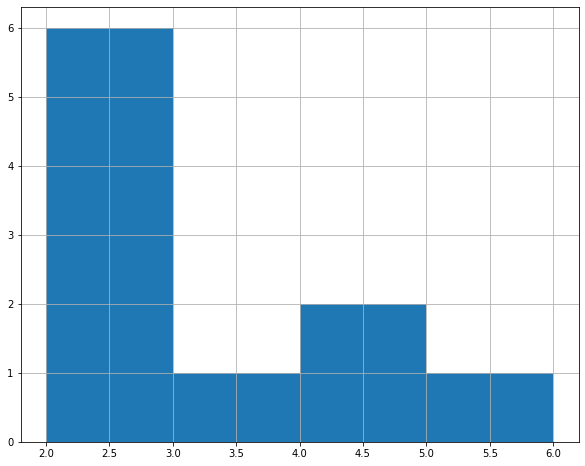

In [7]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2, 3, 4, 5, 6]);

In [8]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups['group_size'].shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

# Calculate expected value
expected_value = (size_dist['group_size'] * size_dist['prob']).sum()
print(expected_value)

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()/groups_4_or_more.shape[0]
print(prob_4_or_more)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1
0.30000000000000004
0.15000000000000002


## Continuous distributions


### Data back-ups
The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.



In [9]:
from scipy.stats import uniform

# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - \
                        uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

0.16666666666666666
0.8333333333333334
0.3333333333333333


### Simulating wait times
To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.



[ 7.144097    0.97455866  3.72802787  5.11644319  8.70602482 24.69140099
 23.98012075  3.19592668 25.1985306  17.89048629]


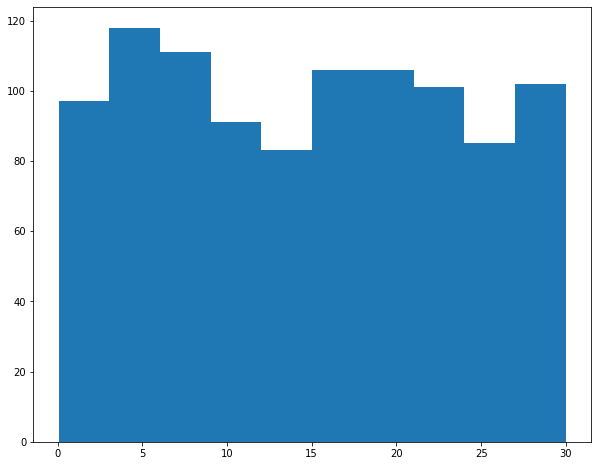

In [10]:
# Set random seed to 334
np.random.seed(334)

# Generates 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(min_time, max_time, 1000)
print(wait_times[:10])

# Create a histogram of simulated times and show plot
plt.hist(wait_times);

## The binomial distribution
- Binomial distribution
    - Probability distribution of the number of successes in a sequence of independent trials
    - Described by $n$ and $p$
        - $n$: total number of trials
        - $p$: probability of success
    - Expected value: $n$ x $p$
    - Independence: The binomial distribution is a probability distribution of the number of successes in a sequence of **independent** trials

### Simulating sales deals
Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

In [11]:
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))

[1]
[0]
0.8461538461538461


### Calculating binomial probabilities
Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.



In [12]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)
print(prob_3)

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)
print(prob_less_than_or_equal_1)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)
print(prob_greater_than_1)

0.026999999999999982
0.7839999999999999
0.21600000000000008


### How many sales will be won?
Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall from the video that the expected value of a binomial distribution can be calculated by $n × p$.

In [13]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998
